In [16]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import preprocessing, model_selection
from sklearn.utils import shuffle
from sklearn import linear_model
import json, csv
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from mpl_toolkits import mplot3d

In [11]:
#Processamento dos dados caso arquivo seja em csv
df = pd.read_csv('data/log.csv')
print(df.head())
df.describe()

                    dateTime  battery  fileSize  sleepiness   pressure   lux  \
0  2022-03-28T22:46:31-03:00    100.0  0.000333           0  921.37450   0.0   
1  2022-03-28T22:46:32-03:00    100.0  0.000492           0  921.35425   0.0   
2  2022-03-28T22:46:33-03:00    100.0  0.000654           0  921.38430   0.0   
3  2022-03-28T22:46:34-03:00    100.0  0.000815           0  921.36890   0.0   
4  2022-03-28T22:46:37-03:00    100.0  0.000979           0  921.35720  36.0   

   heartRate   ppgGreen     ppgRed      ppgIR  saturation  accelerometerZ  \
0        0.0  2115139.0  6290679.0  6554062.0    84.89149       -2.348712   
1        0.0  2285827.0  6339629.0  6544423.0    85.00039       -2.477999   
2        0.0  2495719.0  6369232.0  6556569.0    84.99994       -2.348712   
3        0.0  2589617.0  6366988.0  6550969.0    84.99997       -2.236184   
4        0.0  2438508.0  6397196.0  6559814.0    84.99999       -4.800375   

   accelerometerX  accelerometerY  gyroscopeZ  gyroscope

,battery,fileSize,sleepiness,pressure,lux,heartRate,ppgGreen,ppgRed,ppgIR,saturation,accelerometerZ,accelerometerX,accelerometerY,gyroscopeZ,gyroscopeX,gyroscopeY
count,25599.000000,25599.000000,25599.000000,25599.000000,25599.000000,25599.000000,2.559900e+04,2.559900e+04,2.559900e+04,25599.000000,25599.000000,25599.000000,25599.000000,25599.000000,25599.000000,25599.000000
mean,53.758897,0.932108,1.111762,958.225798,1.111293,69.767452,1.846819e+06,5.816276e+06,6.027862e+06,87.324927,0.615273,-1.814121,5.148495,-0.002771,-0.000200,-0.000038
std,28.396053,0.729135,0.887826,49.362761,6.377853,12.939413,4.534837e+05,4.678981e+05,4.068138e+05,11.915742,4.152476,4.631276,5.404665,0.386758,0.261962,0.293546
min,2.000000,0.000216,0.000000,918.913600,0.000000,0.000000,-4.300000e+02,4.075070e+05,4.815940e+05,0.000000,-16.223110,-19.390640,-15.229517,-7.221649,-5.431814,-7.004181
25%,30.000000,0.336272,0.000000,920.177005,0.000000,63.000000,1.537078e+06,5.396296e+06,5.661601e+06,85.000000,-2.322376,-3.622427,1.525106,-0.003665,-0.003665,-0.002443
50%,54.000000,0.672160,1.000000,920.800800,0.000000,68.000000,1.949232e+06,5.934467e+06,6.094718e+06,85.000010,0.622492,-2.760515,7.910442,0.000000,0.000000,0.000000
75%,78.000000,1.521379,2.000000,1021.713870,0.000000,72.000000,2.172996e+06,6.176944e+06,6.350020e+06,94.000000,4.697424,-0.790087,9.205706,0.003665,0.003665,0.002443
max,100.000000,2.513082,2.000000,1023.536870,196.000000,156.000000,4.194014e+06,8.387100e+06,8.736712e+06,100.000000,12.227188,15.071500,19.311630,9.360899,10.775663,7.112915


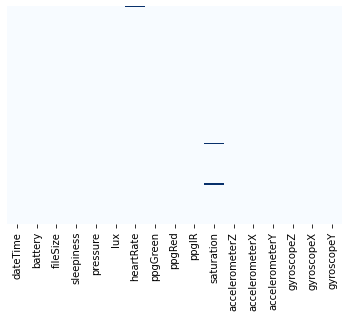

In [5]:
#substituindo leituras erroneas por NaN
df.ppgGreen.replace(0, np.nan, inplace=True)
df.ppgRed.replace(0, np.nan, inplace=True)
df.heartRate.replace(0, np.nan, inplace=True)
df.ppgIR.replace(0, np.nan, inplace=True)
df.saturation.replace(0, np.nan, inplace=True)
hm = sns.heatmap(df.isnull(),cbar=False,yticklabels=False,cmap = 'Blues')
figure = hm.get_figure()
figure.savefig('graphs/missing.png', bbox_inches='tight', dpi=800)

In [6]:
#substituindo os valores faltantes pela media da coluna (caso nao existam nao e necessario executar essa celula)
#obs: apenas valido para valores numericos
def substituteNaNforMean(df):
    num_col = ['heartRate', 'ppgRed', 'ppgGreen', 'ppgIR', 'saturation'] # lista com as colunas que possuem valores faltantes
    print(df.isna().sum())
    for col in num_col:
        df[col]=pd.to_numeric(df[col])
        df[col].fillna(df[col].mean(), inplace=True)
    return df

In [9]:
#Removendo linhas contendo valores invalidos
df = df.dropna()
print(df.isna().sum())
df.describe()

dateTime          0
battery           0
fileSize          0
sleepiness        0
pressure          0
lux               0
heartRate         0
ppgGreen          0
ppgRed            0
ppgIR             0
saturation        0
accelerometerZ    0
accelerometerX    0
accelerometerY    0
gyroscopeZ        0
gyroscopeX        0
gyroscopeY        0
dtype: int64


,battery,fileSize,sleepiness,pressure,lux,heartRate,ppgGreen,ppgRed,ppgIR,saturation,accelerometerZ,accelerometerX,accelerometerY,gyroscopeZ,gyroscopeX,gyroscopeY
count,25173.000000,25173.000000,25173.00000,25173.000000,25173.000000,25173.00000,2.517300e+04,2.517300e+04,2.517300e+04,25173.000000,25173.000000,25173.000000,25173.000000,25173.000000,25173.000000,25173.000000
mean,53.021094,0.947124,1.13002,957.299435,0.858539,69.59830,1.840255e+06,5.817668e+06,6.030138e+06,88.653825,0.631347,-1.775621,5.199075,-0.003344,-0.000558,0.000167
std,28.042538,0.725581,0.88352,49.099095,5.608632,12.02849,4.506275e+05,4.665957e+05,4.050192e+05,5.185102,4.127228,4.606610,5.398127,0.374790,0.246264,0.284102
min,2.000000,0.004045,0.00000,918.913600,0.000000,52.00000,6.893290e+05,4.075070e+05,4.815940e+05,84.000000,-16.223110,-19.390640,-15.229517,-7.221649,-5.431814,-7.004181
25%,30.000000,0.352661,0.00000,920.164550,0.000000,63.00000,1.533414e+06,5.396243e+06,5.664064e+06,85.000000,-2.319981,-3.612850,2.018312,-0.003665,-0.003665,-0.002443
50%,53.000000,0.683138,1.00000,920.787100,0.000000,68.00000,1.939164e+06,5.941473e+06,6.097546e+06,85.000010,0.620098,-2.755726,7.915231,0.000000,0.000000,0.000000
75%,77.000000,1.537433,2.00000,1021.693600,0.000000,72.00000,2.166834e+06,6.177633e+06,6.350860e+06,95.000000,4.697424,-0.790087,9.215282,0.003665,0.003665,0.002443
max,100.000000,2.513082,2.00000,1023.221440,196.000000,156.00000,4.194014e+06,8.387100e+06,8.736712e+06,100.000000,12.227188,15.071500,16.642096,9.360899,6.211278,7.112915


In [38]:
#Separando atributos e classe em um novo dataset
attributes = ["ppgRed", "ppgIR"]
label = "saturation"
data = df[attributes+[label]]
data.describe()

,ppgRed,ppgIR,saturation
count,2.559900e+04,2.559900e+04,25599.000000
mean,5.816276e+06,6.027862e+06,87.324927
std,4.678981e+05,4.068138e+05,11.915742
min,4.075070e+05,4.815940e+05,0.000000
25%,5.396296e+06,5.661601e+06,85.000000
50%,5.934467e+06,6.094718e+06,85.000010
75%,6.176944e+06,6.350020e+06,94.000000
max,8.387100e+06,8.736712e+06,100.000000


In [40]:
#calculando o numero de outliers
def outlierCount(df, var):
    try:
        q1= df[var].quantile(0.25)
        q3 = df[var].quantile(0.75)
        iqRange = q3 - q1
        maxVal = q3 + 1.5 * iqRange
        minVal = q1 - 1.5 * iqRange
        count = len(df[(df[var] < minVal)]) + len(df[(df[var] > maxVal)])
        return count, minVal, maxVal
    except:
        #print(f"{var} falhou")
        return "null", "null", "null"

for col in data.columns:
    a, b, c = outlierCount(data, col)
    print(f'{col}: {a},'.ljust(25) + f' |min = {b},'.ljust(35) + f' |max = {c}')

ppgRed: 35,               |min = 4225322.0,                  |max = 7347918.0
ppgIR: 29,                |min = 4628973.25,                 |max = 7382647.25
saturation: 382,          |min = 71.5,                       |max = 107.5


In [41]:
#normalizacao por z-score (standardize)
def standardize(df):
    scaledDf = df.copy()
    #aplicando a formula do z-score (x-media / desvio padrao)
    for column in scaledDf.columns:
        #as colunas de horario, tamanho de arquivo e bateria sao desconsideradas
        if column != 'dateTime' and column != 'size' and column != 'battery':
            scaledDf[column] = (scaledDf[column] - scaledDf[column].mean()) / scaledDf[column].std()
    #retorna os valores com media = 0 e desvio padrao = 1
    return scaledDf

In [42]:
#normalizacao por maximum absolute scaling
def maxAbsoluteScale(df):
    scaledDf = df.copy()
    #Divide cada valor de uma coluna pelo valor maximo da mesma
    for column in scaledDf.columns:
        #as colunas de horario, tamanho de arquivo e bateria sao desconsideradas
        if column != 'dateTime' and column != 'size' and column != 'battery':
            scaledDf[column] = scaledDf[column]  / scaledDf[column].abs().max()
    #retorna os valores em uma escala de -1 a 1
    return scaledDf

In [43]:
#normalizacao por min-max
def minMaxScale(df):
    scaledDf = df.copy()
    #aplicando a formula do min-max (x-min / range)
    for column in scaledDf.columns:
        #as colunas de horario, tamanho de arquivo e bateria sao desconsideradas
        if column != 'dateTime' and column != 'size' and column != 'battery':
            scaledDf[column] = (scaledDf[column] - scaledDf[column].min()) / (scaledDf[column].max() - scaledDf[column].min())
    #retorna os valores em uma escala entre 0 e 1
    return scaledDf

In [44]:
#normalizacao por robust scaling (ideal para dados com muitos outliers)
def robustScaling(df):
    scaledDf = df.copy()
    #aplicando a formula do robust scaling (x-mediana/(q3-q2)*) *interquartille range
    for column in scaledDf.columns:
        #as colunas de horario, tamanho de arquivo e bateria sao desconsideradas
        if column != 'dateTime' and column != 'size' and column != 'battery':
            scaledDf[column] = (scaledDf[column] - scaledDf[column].median())  / (scaledDf[column].quantile(0.75) - scaledDf[column].quantile(0.25))
    return scaledDf

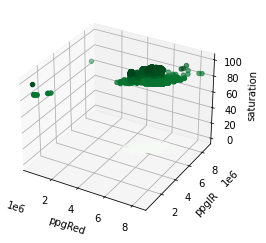

In [39]:
#Visualizacao dos dados em um espaco 3d
x = np.array(data[attributes])
y = np.array(data[label])

x_line = np.array(data[attributes[0]])
y_line = np.array(data[attributes[1]])
z_line = np.array(data[label])

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_xlabel('ppgRed', rotation=150)
ax.set_ylabel('ppgIR')
ax.set_zlabel('saturation', rotation=240)

#ax.plot3D(x_line, y_line, z_line, 'gray')
ax.scatter3D(x_line, y_line, z_line, c=z_line, cmap='Greens')
fig.savefig('graphs/satu3d.png', bbox_inches='tight')

In [54]:
#Executando regressao linear
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.15)
model = linear_model.LinearRegression()
model.fit(x_train, y_train)
#Termo independente:
print(model.intercept_)
#Coeficientes:
print(model.coef_)
#Acuracia do modelo
print(model.score(x_test, y_test))

y_pred = model.predict(x_test)
results = pd.DataFrame({'Real': y_test.flatten(), 'Predito': y_pred.flatten()})

0.31910365764452997
[0.20466349 0.31840278]
0.06112128051317289


In [70]:
#Previsoes
y_pred = model.predict(x_test)
results = pd.DataFrame({'Real': y_test.flatten(), 'Predito': y_pred.flatten()})
results

,Real,Predito
0,1.444443e+00,0.598864
1,-1.111111e-06,0.355386
2,-4.444444e-06,0.332123
3,1.333332e+00,0.422553
4,8.888878e-01,0.497189
...,...,...
3835,1.222221e+00,0.344840
3836,-2.222222e-06,0.315446
3837,-1.111111e-06,0.185757
3838,5.555556e-07,-0.142579


In [45]:
#testes com pre processamento dos dados
maxAbsDf = maxAbsoluteScale(data)
minMaxDf = minMaxScale(data)
zScoreDf = standardize(data)
robustDf = robustScaling(data)

In [66]:
#Teste max absolute scale
x = np.array(maxAbsDf[attributes])
y = np.array(maxAbsDf[label])
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.15)
model = linear_model.LinearRegression()
model.fit(x_train, y_train)
#Termo independente:
print(model.intercept_)
#Coeficientes:
print(model.coef_)
#Acuracia do modelo
print(model.score(x_test, y_test))

y_pred = model.predict(x_test)
results = pd.DataFrame({'Real': y_test.flatten(), 'Predito': y_pred.flatten()})

0.4868541484122215
[0.17683819 0.38227517]
0.06790518861578643


In [73]:
#Teste min max scale
x = np.array(minMaxDf[attributes])
y = np.array(minMaxDf[label])
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.15)
model = linear_model.LinearRegression()
model.fit(x_train, y_train)
#Termo independente:
print(model.intercept_)
#Coeficientes:
print(model.coef_)
#Acuracia do modelo
print(model.score(x_test, y_test))

y_pred = model.predict(x_test)
results = pd.DataFrame({'Real': y_test.flatten(), 'Predito': y_pred.flatten()})

0.5157751666859978
[0.18078308 0.34937739]
0.06500886058078459


In [71]:
#Teste z-score scale
x = np.array(zScoreDf[attributes])
y = np.array(zScoreDf[label])
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.15)
model = linear_model.LinearRegression()
model.fit(x_train, y_train)
#Termo independente:
print(model.intercept_)
#Coeficientes:
print(model.coef_)
#Acuracia do modelo
print(model.score(x_test, y_test))

y_pred = model.predict(x_test)
results = pd.DataFrame({'Real': y_test.flatten(), 'Predito': y_pred.flatten()})

0.00614390460163588
[0.08341562 0.15301846]
0.04329334422747566


In [68]:
#Teste robust scale
x = np.array(robustDf[attributes])
y = np.array(robustDf[label])
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.15)
model = linear_model.LinearRegression()
model.fit(x_train, y_train)
#Termo independente:
print(model.intercept_)
#Coeficientes:
print(model.coef_)
#Acuracia do modelo
print(model.score(x_test, y_test))

y_pred = model.predict(x_test)
results = pd.DataFrame({'Real': y_test.flatten(), 'Predito': y_pred.flatten()})

0.3246563511636271
[0.20775982 0.31892972]
0.053743880600870875


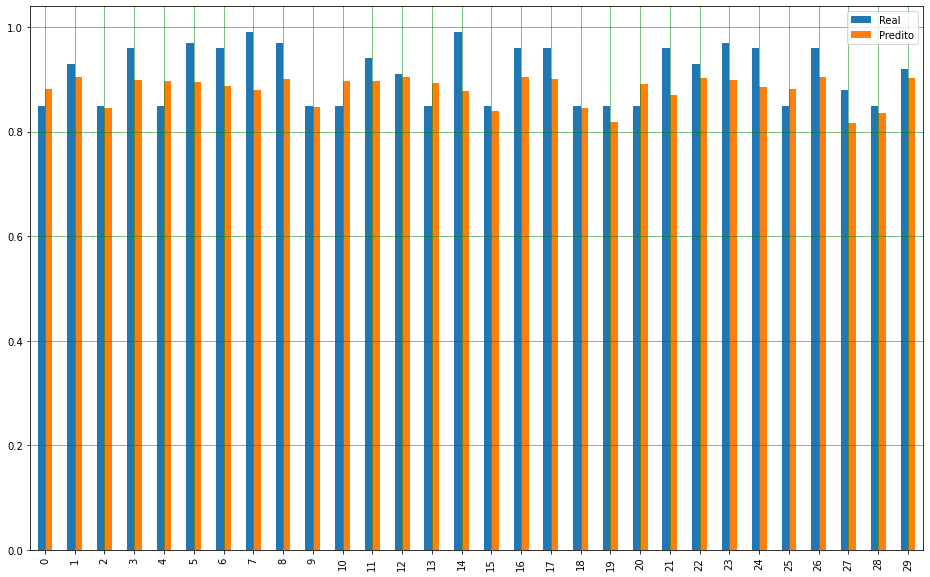

In [74]:
#plotando resultados
df1 = results.head(30)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()